[![Azure Notebooks](https://notebooks.azure.com/launch.svg)](https://notebooks.azure.com/wang-jingz/projects/house-price-regression)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import folium
from folium.plugins import HeatMap

# Overview
Dataset "House Sales in King County, USA" is used to predict the house prices as well as the prices per square foot. We will start from preparing the data by cleaning and refining it. Some features unrelated or unsuitable for regression, such as id and zipcode, are removed from the form to improve the training performance. There are many 0 values in renovated year indicating the houses have never been renovated since built, so we replace them with their built year.

In [2]:
df = pd.read_csv('kc_house_data.csv')

df['price_per_square'] = df['price'] / df['sqft_living']

#Remove 0 from yr_renovated
raw_renovated_values = df[['yr_built', 'yr_renovated']].values
df = df.rename(columns={'yr_renovated': 'yr_renovated_raw'})
for record in raw_renovated_values:
    if record[1] == 0:
        record[1] = record[0]
df['yr_renovated'] = raw_renovated_values[:, 1]

cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
        'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
        'yr_renovated']

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated_raw,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_square,yr_renovated
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,264.183766,1973.386018
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,110.100510,28.806854
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,87.588235,1900.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,182.291667,1954.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,244.644550,1977.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,318.378378,1999.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,810.138889,2015.000000


**Visualize data with the histograms of dataframe.**

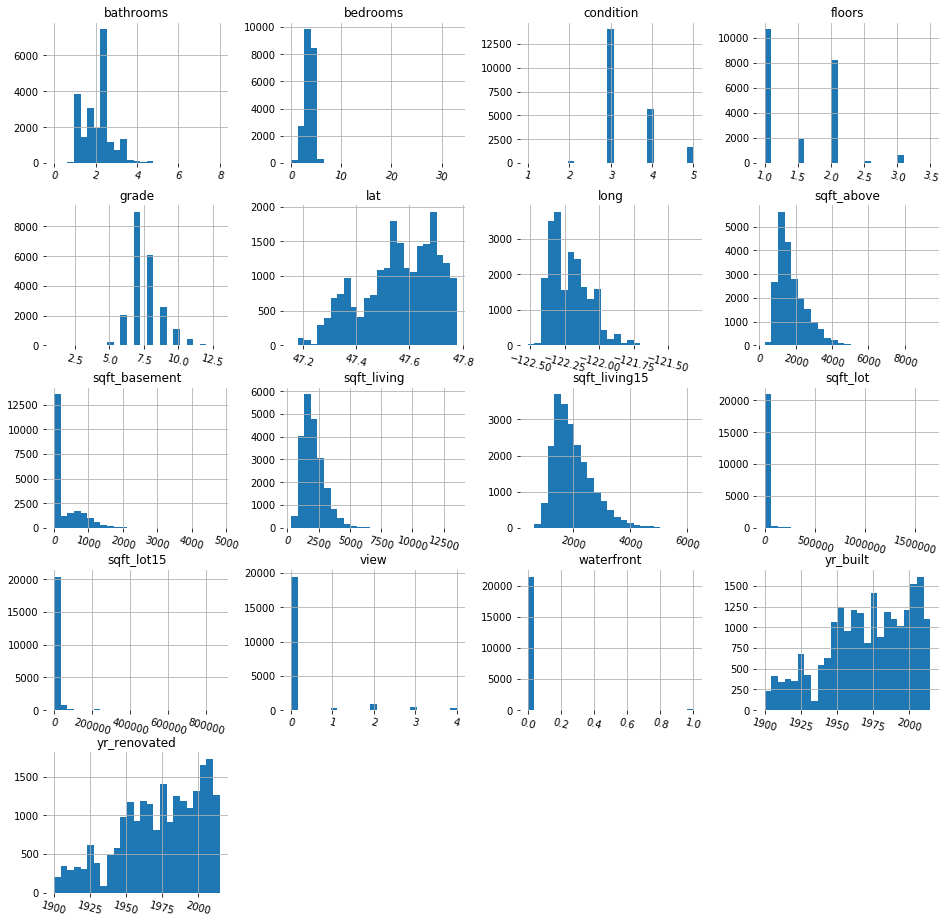

In [3]:
histogram = df[cols].hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
for x in histogram.ravel():
    x.title.set_size(12)
    x.yaxis.tick_left()

**Use latitude and longitude information to displaye the heat map.**

In [4]:
maxpr=df.loc[df['price'].idxmax()]
minpr=df.loc[df['price'].idxmin()]

basemap = folium.Map(location=[47.5112, -122.257], control_scale=True, zoom_start=9.4)
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the houses which have the highest and lowest prices
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),icon=folium.Icon(color='green')).add_to(s)
folium.Marker([minpr['lat'], minpr['long']],popup='Lowest Price: $'+str(format(minpr['price'],'.0f')),icon=folium.Icon(color='green')).add_to(s)

HeatMap(data=df[['lat','long']].groupby(['lat','long']).sum().reset_index().values.tolist(),radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

**Check the correlation between features with correlation matrix.**

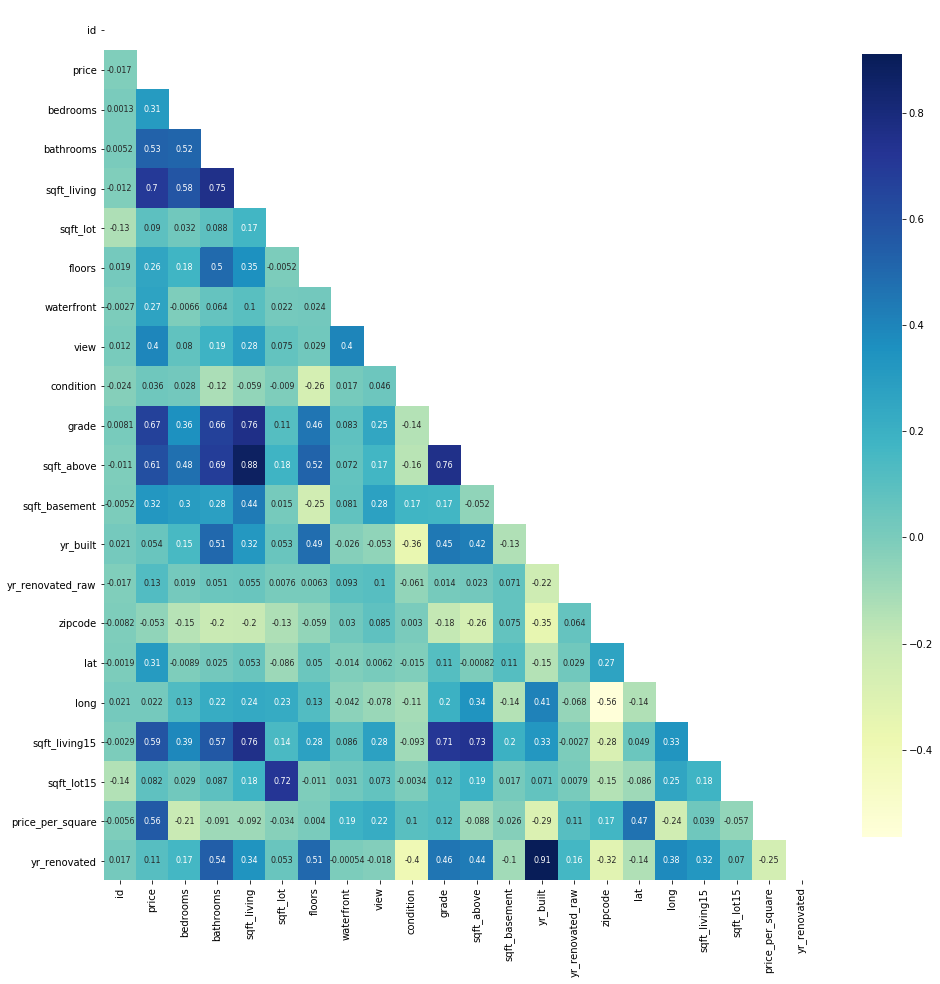

In [22]:
plt.figure(figsize=(16, 16))
cor = df.corr()
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(cor, annot=True, cmap="YlGnBu", linecolor='w', annot_kws={"size":8}, mask=mask, cbar_kws={"shrink": .9})
plt.show()

# Regression
We tried out 5 different regression models to predict the house price. 
The first one is simple linear regression with single feature "sqft_living", which is the most related feature to house prices. With only one feature, it is easy to be displayed.

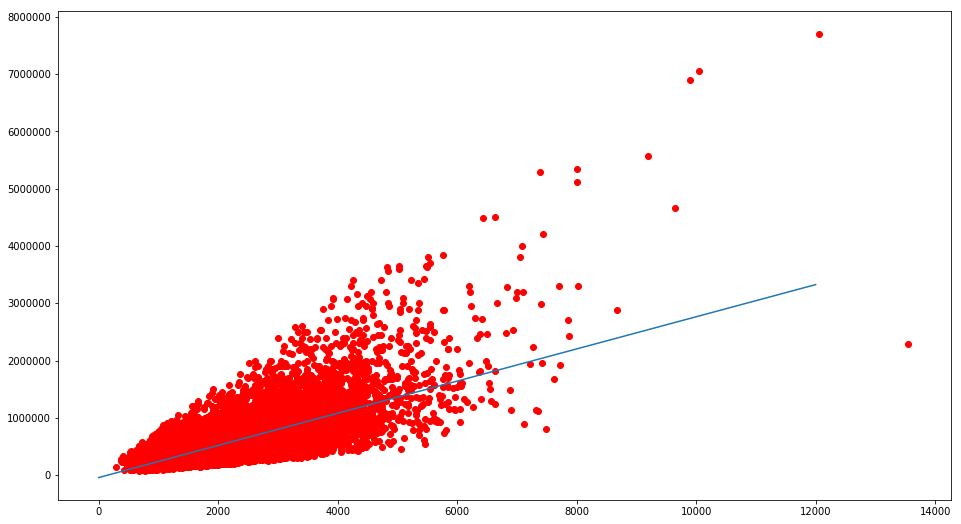

In [25]:
from sklearn.linear_model import LinearRegression
attrs = df[['sqft_living']]
targets = df['price']
sl_model = LinearRegression().fit(attrs, targets)
pred = sl_model.predict([[1],[12000]])
plt.figure(figsize=(16,9))
plt.plot([[1],[12000]], pred)
plt.scatter(attrs, targets, color='red')
plt.show()

Linear Regression with raw features

In [7]:
price_lr_model = LinearRegression().fit(df[cols], df['price'])
pps_lr_model = LinearRegression().fit(df[cols], df['price_per_square'])
linear_scores = []
linear_scores.append(price_lr_model.score(df[cols], df['price']))
linear_scores.append(pps_lr_model.score(df[cols], df['price_per_square']))

Polynomial Regression

In [8]:
X_pol = PolynomialFeatures().fit_transform(df[cols])
price_pol_model = LinearRegression().fit(X_pol, df['price'])
pps_pol_model = LinearRegression().fit(X_pol, df['price_per_square'])
polynomial_scores = []
polynomial_scores.append(price_pol_model.score(X_pol, df['price']))
polynomial_scores.append(pps_pol_model.score(X_pol, df['price_per_square']))

Polynomial Regression with Ridge & Lasso Regularization

In [9]:
X_pol = PolynomialFeatures().fit_transform(df[cols])
price_pol_ridge_model = Ridge(alpha=1000).fit(X_pol, df['price'])
pps_pol_ridge_model = Ridge(alpha=1000).fit(X_pol, df['price_per_square'])
price_pol_lasso_model = Lasso(alpha=1000, max_iter=10000).fit(X_pol, df['price'])
pps_pol_lasso_model = Lasso(alpha=1000, max_iter=10000).fit(X_pol, df['price_per_square'])
ridge_scores = []
ridge_scores.append(price_pol_ridge_model.score(X_pol, df['price']))
ridge_scores.append(pps_pol_ridge_model.score(X_pol, df['price_per_square']))
lasso_scores = []
lasso_scores.append(price_pol_lasso_model.score(X_pol, df['price']))
lasso_scores.append(pps_pol_lasso_model.score(X_pol, df['price_per_square']))

d:\python\python367\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\python\python367\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


**Score Comparison**

In [12]:
score_table = pd.DataFrame([
    ['Linear Regression'] + linear_scores,
    ['Polynomial Regression'] + polynomial_scores,
    ['Ridge Regression'] + ridge_scores,
    ['Lasso Regression'] + lasso_scores], 
    columns=['Model', 'Price Prediction Score', 'Price Per Square Foot Score'])
score_table

,Model,Price Prediction Score,Price Per Square Foot Score
0,Linear Regression,0.695278,0.474296
1,Polynomial Regression,0.814901,0.614839
2,Ridge Regression,0.797943,0.580626
3,Lasso Regression,0.785994,0.537237


We can conclude from the evaluation table that the polynomial regression is the best at predicting house prices.

**Predict the price of a house with the Polynomial Regression model**

In [28]:
samples = PolynomialFeatures().fit_transform(df[cols][0:1])
print(price_pol_model.predict(samples))

[323909.25506175]
